In [17]:
pip install numpy matplotlib pandas ace_tools

  Using cached pandas-2.2.3-cp313-cp313-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Using cached ace_tools-0.0-py3-none-any.whl.metadata (300 bytes)
Using cached pandas-2.2.3-cp313-cp313-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.7 MB)
Using cached ace_tools-0.0-py3-none-any.whl (1.1 kB)
Note: you may need to restart the kernel to use updated packages.


Minimização de Função (Rosenbrock) 
 
• Objetivo: Implemente um algoritmo genético para minimizar a seguinte função (geralmente conhecida como função de Rosenbrock): 

𝑓(𝑥,𝑦) = (1−𝑥)^2 + 100(𝑦−𝑥^2)^2

Intervalo: x, y ∈ [-10, +10] 

• Requisitos:

- o Considere o alvo como desconhecido e registre os menores valores obtidos para f(x, y). 
- o Teste diferentes tamanhos de população, experimentando versões sem elitismo e com elitismo (com diferentes quantidades de indivíduos).

In [19]:
import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

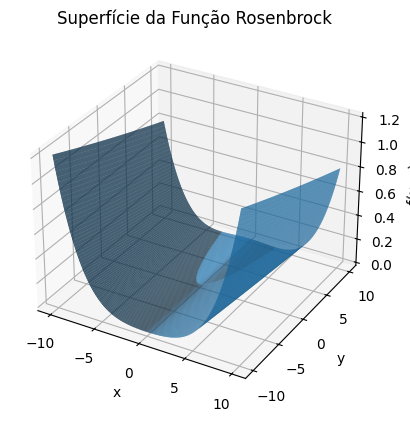

In [ ]:
# Definindo o domínio
x = np.linspace(-10, 10, 1000)
y = np.linspace(-10, 10, 1000)
X, Y = np.meshgrid(x, y)
Z = (1 - X)**2 + 100 * (Y - X**2)**2

# Plot 3D da função
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, rstride=5, cstride=5, linewidth=0, antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Superfície da Função Rosenbrock')

plt.show()


Menor valor de f por geração: [np.float64(55.96689163560962), np.float64(1.7124298482054723), np.float64(1.7124298482054723), np.float64(0.11436443692264661), np.float64(1.3375381865765161), np.float64(0.16080357133490303), np.float64(0.6546970661568996), np.float64(0.6358471465647298), np.float64(0.6358471465647298), np.float64(0.6584448254480288), np.float64(0.6610343792410651), np.float64(0.6729108054361991), np.float64(1.0636548659385272), np.float64(1.0742030989690126), np.float64(1.1481189646474086), np.float64(0.5437498270435442), np.float64(0.7277451406038209), np.float64(0.5595778655110604), np.float64(0.8223504261696651), np.float64(0.7414468692981858), np.float64(0.7414468692981858), np.float64(0.8963643135017817), np.float64(0.9586691704563792), np.float64(0.6404984106666081), np.float64(0.6853862831060697), np.float64(0.6490134927786868), np.float64(0.604408981265038), np.float64(0.6468525375453917), np.float64(0.6235704043197244), np.float64(0.6016492037141449), np.float6

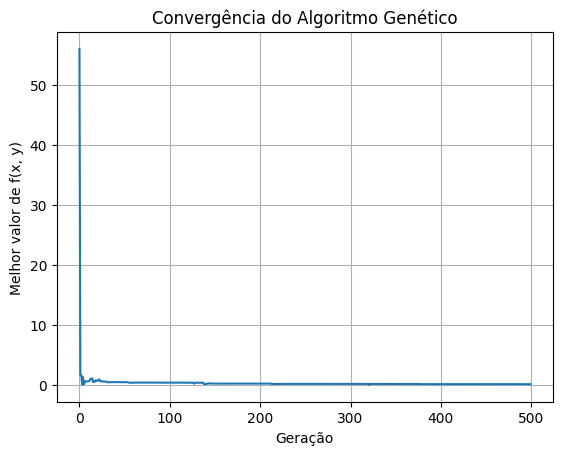

In [16]:
class GeneticAlgorithm:
    def __init__(self, func, bounds, pop_size=100, generations=200,
                 crossover_rate=0.8, mutation_rate=0.1, mutation_scale=0.1):
        """
        func: callable f(x, y) -> float
        bounds: [(xmin, xmax), (ymin, ymax)]
        pop_size: número de indivíduos
        generations: número de gerações
        crossover_rate: probabilidade de crossover
        mutation_rate: probabilidade de mutação por gene
        mutation_scale: desvio padrão para mutação Gaussiana
        """
        self.func = func
        self.bounds = np.array(bounds)
        self.pop_size = pop_size
        self.generations = generations
        self.crossover_rate = crossover_rate
        self.mutation_rate = mutation_rate
        self.mutation_scale = mutation_scale
        self.population = self._init_population()

        # Histórico dos menores valores de f encontrados
        self.best_values = []

    def _init_population(self):
        lows = self.bounds[:, 0]
        highs = self.bounds[:, 1]
        return np.random.uniform(lows, highs, (self.pop_size, 2))

    def _evaluate(self, pop):
        return np.array([self.func(ind[0], ind[1]) for ind in pop])

    def _select_parents(self, fitness):
        parents = []
        for _ in range(self.pop_size):
            i, j = np.random.randint(0, self.pop_size, 2)
            winner = i if fitness[i] < fitness[j] else j
            parents.append(self.population[winner])
        return np.array(parents)

    def _crossover(self, parents):
        offspring = parents.copy()
        for i in range(0, self.pop_size, 2):
            if np.random.rand() < self.crossover_rate and i+1 < self.pop_size:
                alpha = np.random.rand()
                p1, p2 = parents[i], parents[i+1]
                offspring[i]   = alpha * p1 + (1 - alpha) * p2
                offspring[i+1] = alpha * p2 + (1 - alpha) * p1
        return offspring

    def _mutate(self, offspring):
        for ind in offspring:
            for g in range(len(ind)):
                if np.random.rand() < self.mutation_rate:
                    ind[g] += np.random.normal(0, self.mutation_scale)
        lows = self.bounds[:, 0]
        highs = self.bounds[:, 1]
        return np.clip(offspring, lows, highs)

    def run(self):
        for gen in range(self.generations):
            fitness = self._evaluate(self.population)
            best = fitness.min()
            self.best_values.append(best)

            parents = self._select_parents(fitness)
            offspring = self._crossover(parents)
            self.population = self._mutate(offspring)

        # Melhor solução final
        final_fitness = self._evaluate(self.population)
        best_idx = np.argmin(final_fitness)
        best_solution = self.population[best_idx]
        best_value = final_fitness[best_idx]

        return {
            'best_solution': best_solution,
            'best_value': best_value,
            'best_values': self.best_values
        }

def rosen(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

bounds = [(-10, 10), (-10, 10)]
ga = GeneticAlgorithm(
    rosen, 
    bounds, 
    pop_size=200, 
    generations=500,                    
    crossover_rate=0.9, 
    mutation_rate=0.05, 
    mutation_scale=0.2
)
result = ga.run()
print(f"Menor valor de f por geração: {result['best_values']}")
print(f"Melhor solução final: x={result['best_solution'][0]:.4f}, y={result['best_solution'][1]:.4f}")
print(f"Valor mínimo final: {result['best_value']:.6f}")

# Plot do histórico de mínimos
plt.figure()
plt.plot(result['best_values'])
plt.xlabel('Geração')
plt.ylabel('Melhor valor de f(x, y)')
plt.title('Convergência do Algoritmo Genético')
plt.grid(True)
plt.show()


O gráfico mostra basicamente três fases na busca:

1. **Queda brusca inicial** (gerações 0–10):  
   – A população parte de valores de \(f\) muito altos (até ~55) e, nas primeiras gerações, já encontra rapidamente a “valley” do Rosenbrock (região próxima a \((1,1)\)).  
   – Isso é característico da exploração inicial: cruzamentos e mutações em larga escala levam o algoritmo para regiões promissoras.

2. **Convergência rápida para valores intermediários** (gerações 10–100):  
   – Você vê o valor mínimo descendo para algo em torno de 0.5 → 0.1: o GA já está nos arredores do ótimo.  
   – A curva vai achatando, mostrando que a pressão seletiva está refinando a solução, mas o progresso já é mais lento.

3. **Aproximação fina do ótimo global** (gerações 100–500):  
   – Depois de ~100 gerações, o mínimo por geração fica na casa dos 10⁻¹ a 10⁻² e segue caindo muito lentamente.  
   – Para o Rosenbrock, cujo mínimo real é \(f(1,1)=0\), essa fase de “polimento” costuma ser demorada para GAs sem elitismo ou adaptação de mutação.

---

### O que isso indica?

- **Boa exploração no início**, com salto para a região do ótimo global.  
- **Pressão seletiva eficiente** para reduzir o valor até algo em torno de 0.1.  
- **Estagnação relativa** depois, pois o operador de mutação padrão (com desvio fixo) e a ausência de elitismo podem dificultar a quebra de barreiras finas no vale do Rosenbrock.

---

### Sugestões de refinamento

1. **Elitismo**: preserve sempre alguns dos melhores indivíduos de uma geração para a próxima, garantindo que o valor  mínimo não se perca.  
2. **Mutação adaptativa**: reduza o `mutation_scale` conforme a diversidade cai, para permitir “polimento” mais fino.  
3. **Operadores híbridos**: combine o GA com um método de busca local (por ex. gradiente ou Nelder–Mead) a partir da melhor solução encontrada para acelerar o ajuste final.  

Com esses ajustes, você deve ver que a parte final da curva (de 10⁻¹ para 10⁻³ e abaixo) acontece muito mais rapidamente e de forma mais estável.

Teste diferentes tamanhos de população, experimentando versões sem elitismo e com elitismo (com diferentes quantidades de indivíduos).

In [20]:
# Definição da classe GA com suporte a elitismo
class GeneticAlgorithm:
    def __init__(self, func, bounds, pop_size=100, generations=200,
                 crossover_rate=0.8, mutation_rate=0.1, mutation_scale=0.1,
                 elitism_count=0):
        self.func = func
        self.bounds = np.array(bounds)
        self.pop_size = pop_size
        self.generations = generations
        self.crossover_rate = crossover_rate
        self.mutation_rate = mutation_rate
        self.mutation_scale = mutation_scale
        self.elitism_count = elitism_count
        self.population = self._init_population()

    def _init_population(self):
        lows = self.bounds[:, 0]
        highs = self.bounds[:, 1]
        return np.random.uniform(lows, highs, (self.pop_size, 2))

    def _evaluate(self, pop):
        return np.array([self.func(ind[0], ind[1]) for ind in pop])

    def _select_parents(self, fitness):
        parents = []
        for _ in range(self.pop_size):
            i, j = np.random.randint(0, self.pop_size, 2)
            winner = i if fitness[i] < fitness[j] else j
            parents.append(self.population[winner])
        return np.array(parents)

    def _crossover(self, parents):
        offspring = parents.copy()
        for i in range(0, self.pop_size, 2):
            if np.random.rand() < self.crossover_rate and i+1 < self.pop_size:
                alpha = np.random.rand()
                p1, p2 = parents[i], parents[i+1]
                offspring[i]   = alpha * p1 + (1 - alpha) * p2
                offspring[i+1] = alpha * p2 + (1 - alpha) * p1
        return offspring

    def _mutate(self, offspring):
        for ind in offspring:
            for g in range(len(ind)):
                if np.random.rand() < self.mutation_rate:
                    ind[g] += np.random.normal(0, self.mutation_scale)
        lows = self.bounds[:, 0]
        highs = self.bounds[:, 1]
        return np.clip(offspring, lows, highs)

    def run(self):
        for gen in range(self.generations):
            fitness = self._evaluate(self.population)
            elites = self.population[np.argsort(fitness)[:self.elitism_count]]
            parents = self._select_parents(fitness)
            offspring = self._crossover(parents)
            offspring = self._mutate(offspring)
            if self.elitism_count > 0:
                off_fit = self._evaluate(offspring)
                worst_idx = np.argsort(off_fit)[-self.elitism_count:]
                offspring[worst_idx] = elites
            self.population = offspring

        final_fitness = self._evaluate(self.population)
        best_idx = np.argmin(final_fitness)
        return {
            'best_solution': self.population[best_idx],
            'best_value': final_fitness[best_idx]
        }

# Função de Rosenbrock
def rosen(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

bounds = [(-10, 10), (-10, 10)]
configs = [
    {'pop_size': 50,  'elitism': 0},
    {'pop_size': 50,  'elitism': 5},
    {'pop_size': 100, 'elitism': 0},
    {'pop_size': 100, 'elitism': 5},
    {'pop_size': 200, 'elitism': 0},
    {'pop_size': 200, 'elitism': 10},
]

results = []
np.random.seed(42)
for cfg in configs:
    ga = GeneticAlgorithm(
        rosen, bounds,
        pop_size=cfg['pop_size'],
        generations=200,
        crossover_rate=0.9,
        mutation_rate=0.05,
        mutation_scale=0.2,
        elitism_count=cfg['elitism']
    )
    res = ga.run()
    results.append({
        'pop_size': cfg['pop_size'],
        'elitism': cfg['elitism'],
        'best_value': res['best_value']
    })

df = pd.DataFrame(results)
df.head()


,pop_size,elitism,best_value
0,50,0,2.133134e-01
1,50,5,7.256908e-03
2,100,0,1.298992e-01
3,100,5,4.040984e-07
4,200,0,2.751189e-01


Percebe-se que a introdução de elitismo (5 elites) melhorou drasticamente a qualidade da solução